In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Loading the Dataset
In this classification approach we will be using Logistic Regression, Gaussian Naïve Bayes, Linear SVC

In [15]:
bbc_data = pd.read_csv('bbc_news.csv')
print(bbc_data.shape)
bbc_data

(500, 4)


,body,title,filename,category
0,The global web blog community is being called ...,Global blogger action day called,bbc/tech/016.txt,tech
1,"The ""digital divide"" between rich and poor nat...",Global digital divide 'narrowing',bbc/tech/033.txt,tech
2,The current slew of sports games offers unpara...,Sporting rivals go to extra time,bbc/tech/056.txt,tech
3,Writing a Microsoft Word document can be a dan...,Warning over Windows Word files,bbc/tech/086.txt,tech
4,"Aid workers trying to house, feed and clothe m...",Satellite mapping aids Darfur relief,bbc/tech/223.txt,tech
...,...,...,...,...
495,Wales coach Mike Ruddock says England lock Dan...,Wales critical of clumsy Grewcock,bbc/sport/307.txt,sport
496,Tim Henman saved a match point before fighting...,Henman overcomes rival Rusedski,bbc/sport/421.txt,sport
497,Newly-crowned Australian Open champion Marat S...,Safin cool on Wimbledon,bbc/sport/489.txt,sport
498,The International Association of Athletics Fed...,IAAF will contest Greek decision,bbc/sport/081.txt,sport


In [16]:
# Rename the colums title to "News_Headline and body to Content"
bbc_data.rename(columns={'title': 'News_Headline', 'body': 'Content'}, inplace=True)
bbc_data.dropna(axis=1)
bbc_data.shape

(500, 4)

# Visualization of the Dataset

<Axes: xlabel='count', ylabel='category'>

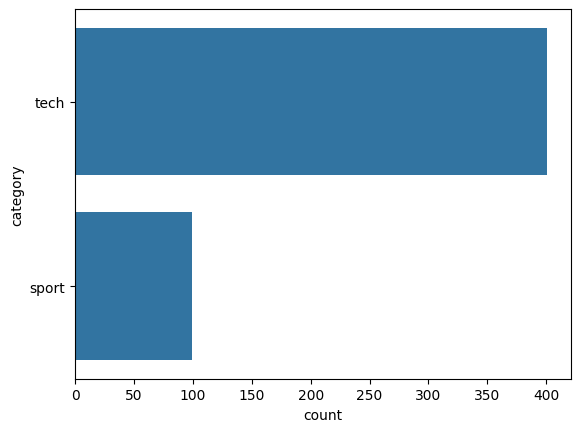

In [20]:
sns.countplot(bbc_data.category)

# Visualize the number of stop words present in our dataset

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sruthipg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


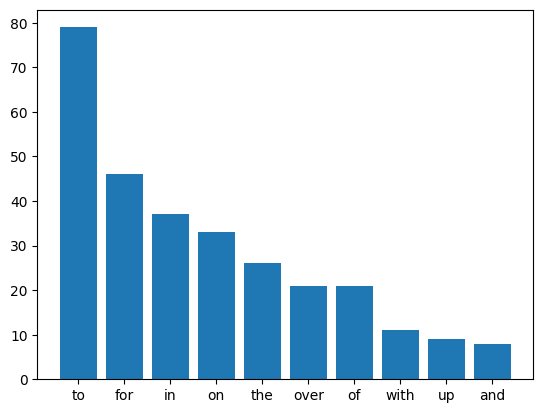

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def plot_stopwords(data):
    sw_nltk = stopwords.words('english')
    print(sw_nltk)
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in sw_nltk:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(bbc_data['News_Headline'])


# Determine the most frequently occurring words in our dataset using rainbow plot

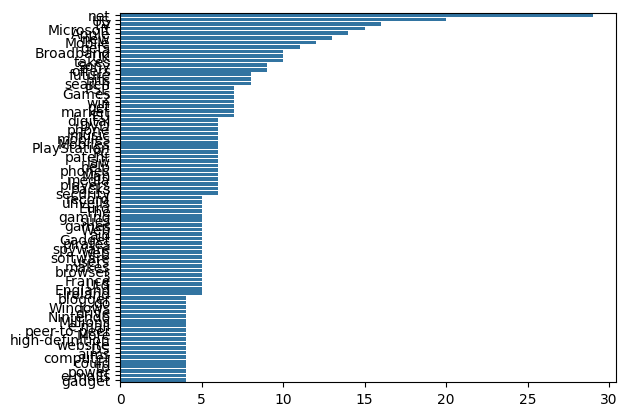

In [26]:
from collections import Counter
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)   
    sns.barplot(x=y,y=x)
top_frequent_words(bbc_data['News_Headline'])

# Create a word cloud to visualize all the words in our dataset

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import download
download('stopwords')
download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sruthipg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sruthipg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

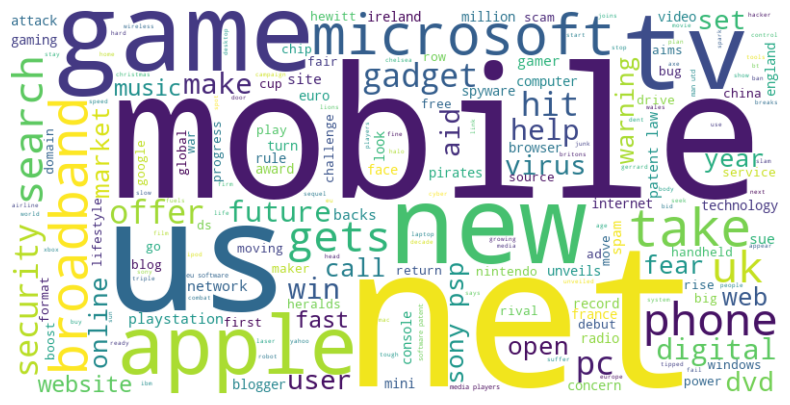

In [49]:

bbc_txt = ' '.join(bbc_data['News_Headline'])
# Tokenize the text into words
words = word_tokenize(bbc_txt)
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Create a string from the filtered words
filtered_text = ' '.join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [54]:
def tokenize_text(text):
    # Split paragraphs (you may need to adjust this based on your actual paragraph separator)
    paragraphs = text.split('\n')  # Assuming paragraphs are separated by newlines

    # Tokenize each paragraph into sentences and then tokenize sentences into words
    tokenized_paragraphs = []
    for paragraph in paragraphs:
        # Tokenize paragraphs into sentences
        sentences = sent_tokenize(paragraph)

        # Tokenize sentences into words
        tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

        tokenized_paragraphs.append(tokenized_sentences)

    return tokenized_paragraphs

# Apply tokenization to each row in the 'text' column
bbc_data['clean_text'] = bbc_data['News_Headline'].apply(tokenize_text)

# Display the tokenized text
print(bbc_data['clean_text'])

0          [[[global, blogger, action, day, called]]]
1        [[[global, digital, divide, 'narrowing, ']]]
2         [[[sporting, rivals, go, to, extra, time]]]
3           [[[warning, over, windows, word, files]]]
4      [[[satellite, mapping, aids, darfur, relief]]]
                            ...                      
495       [[[wales, critical, of, clumsy, grewcock]]]
496          [[[henman, overcomes, rival, rusedski]]]
497                  [[[safin, cool, on, wimbledon]]]
498        [[[iaaf, will, contest, greek, decision]]]
499       [[[wright-phillips, to, start, on, right]]]
Name: clean_text, Length: 500, dtype: object
